In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

%matplotlib inline

import os


import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data 
data = pd.read_csv("heart.csv")

In [3]:
#show top some data
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
#Shape of data
data.shape

(1190, 12)

In [5]:
#Info of data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
#Description
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
#Analysing the 'target' variable
data["target"].describe()

count    1190.000000
mean        0.528571
std         0.499393
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

# Data Analysis

1    629
0    561
Name: target, dtype: int64

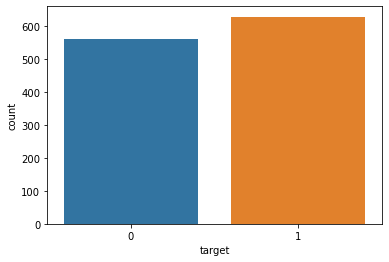

In [8]:
y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

target_temp

In [9]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/1190,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/1190,2)))

Percentage of patience without heart problems: 47.14
Percentage of patience with heart problems: 52.86


In [10]:
#sex data feature
data["sex"].unique()

array([1, 0])

<AxesSubplot:xlabel='sex', ylabel='target'>

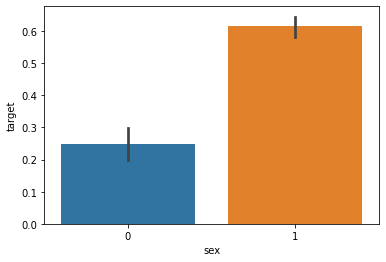

In [11]:
#male and female data compare with target
sns.barplot(data["sex"],y)

We notice, that males are more likely to have heart problems than females

In [12]:
#Chest Pain Type feature
data["chest pain type"].unique()

array([2, 3, 4, 1])

<AxesSubplot:xlabel='chest pain type', ylabel='target'>

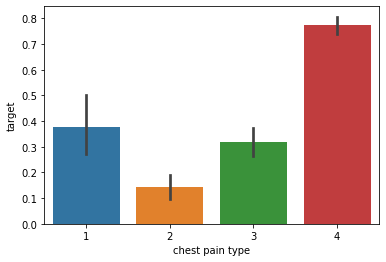

In [13]:
sns.barplot(data["chest pain type"],y)

We notice, that chest pain of '2', i.e. the ones with atypical angina are much less likely to have heart problems

In [14]:
#FBS feature
data["fasting blood sugar"].unique()

array([0, 1])

<AxesSubplot:xlabel='fasting blood sugar', ylabel='target'>

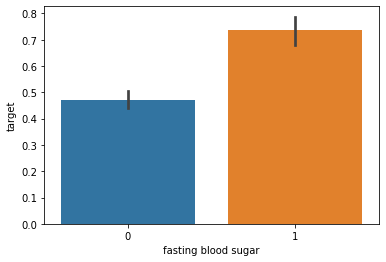

In [15]:
sns.barplot(data["fasting blood sugar"],y)

We noticed that the fasting blood sugar of '0' is less than 120


In [16]:
#Resting electrocardiogram results feature
data["resting ecg"].unique()

array([0, 1, 2])

<AxesSubplot:xlabel='resting ecg', ylabel='target'>

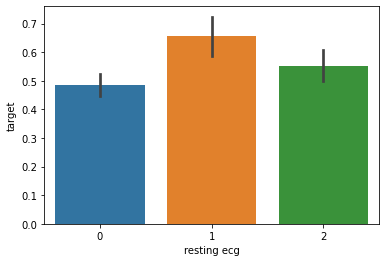

In [17]:
sns.barplot(data["resting ecg"],y)

We noticed that the Resting electrocardiogram results  of '0' is normal much less likely others.

In [18]:
#Exercise induced angina feature
data["exercise angina"].unique()

array([0, 1])

<AxesSubplot:xlabel='exercise angina', ylabel='target'>

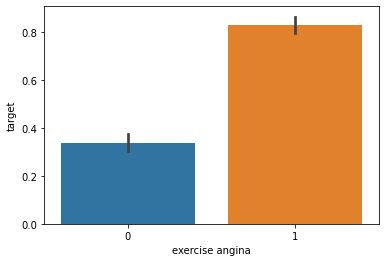

In [19]:
sns.barplot(data["exercise angina"],y)

People with exang=1 i.e. Exercise induced angina are much  likely to have heart problems

In [20]:
#Slope feature
data["ST slope"].unique()

array([1, 2, 3, 0])

<AxesSubplot:xlabel='ST slope', ylabel='target'>

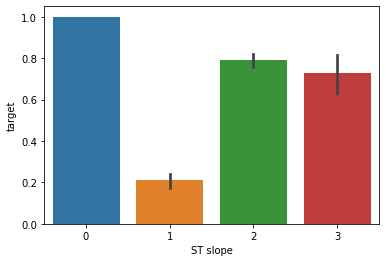

In [21]:
sns.barplot(data["ST slope"],y)

We observe, that Slope '0' causes heart pain much more than Slope '1','2' and '3'

# Train Test split

In [22]:
X = data.drop("target",axis=1)
y = data["target"]

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [24]:
#len of train data
len(x_train)

952

In [25]:
#len of test data
len(x_test)

238

In [26]:
# shape of train data
x_train.shape

(952, 11)

In [27]:
#shape of test data
x_test.shape

(238, 11)

# Decision Tree

In [28]:
#import model
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
model.score(x_train,y_train)

1.0

In [31]:
Y_pred_data = model.predict(x_test)

In [32]:
#shape of predict
print(Y_pred_data.shape)

(238,)


In [33]:
score_data = accuracy_score(Y_pred_data,y_test)*100
score_data

86.97478991596638

In [34]:
print("The accuracy score achieved using Decision Tree is: "+str(score_data)+" %")

The accuracy score achieved using Decision Tree is: 86.97478991596638 %


matrix 

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,Y_pred_data)

array([[ 97,  12],
       [ 19, 110]])

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train)
Y_pred_rf = rf_model.predict(x_test)

In [39]:
score_rf = accuracy_score(Y_pred_rf,y_test)*100
score_rf

93.69747899159664

In [40]:
print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 93.69747899159664 %


matrix

In [41]:
confusion_matrix(y_test,Y_pred_rf)

array([[100,   9],
       [  6, 123]])

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr_model = LogisticRegression()

lr_model.fit(x_train,y_train)

Y_pred_lr = lr_model.predict(x_test)

In [44]:
score_lr = accuracy_score(Y_pred_lr,y_test)*100
score_lr

80.67226890756302

In [45]:
print("The accuracy score achieved using Decision Tree is: "+str(score_lr)+" %")

The accuracy score achieved using Decision Tree is: 80.67226890756302 %


matrix

In [46]:
confusion_matrix(y_test,Y_pred_lr)

array([[ 85,  24],
       [ 22, 107]])

# Neural Network

In [47]:
from keras.models import Sequential
from keras.layers import Dense

In [48]:
model = Sequential()
model.add(Dense(512,activation="relu", input_dim=11))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6144      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 137,729
Trainable params: 137,729
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
model.fit(x_train,y_train,epochs=300)

Epoch 1/300
30/30 [==============================] - 0s 2ms/step - loss: 6.8429 - accuracy: 0.5712
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 1.4389 - accuracy: 0.6741
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.7208
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6856
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 0.5933 - accuracy: 0.7067
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.7356
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 1.1029 - accuracy: 0.6821
Epoch 8/300
30/30 [==============================] - 0s 3ms/step - loss: 0.7397 - accuracy: 0.6818
Epoch 9/300
30/30 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7231
Epoch 10/300
30/30 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7920
Epoch 11/

In [51]:
scores = [score_lr,score_data,score_rf]
algorithms = ["Logistic Regression","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 80.67226890756302 %
The accuracy score achieved using Decision Tree is: 86.97478991596638 %
The accuracy score achieved using Random Forest is: 93.69747899159664 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

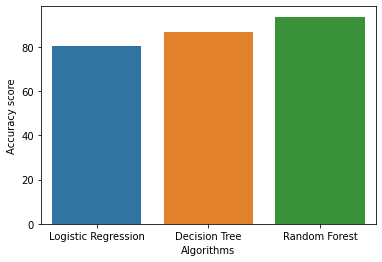

In [52]:
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

# ***************************************thanks you*********************